In [1]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
Startup_Data = pd.read_csv('50_Startups.csv')

In [4]:
Startup_Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
Startup_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
Startup_Data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
Startup_Data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


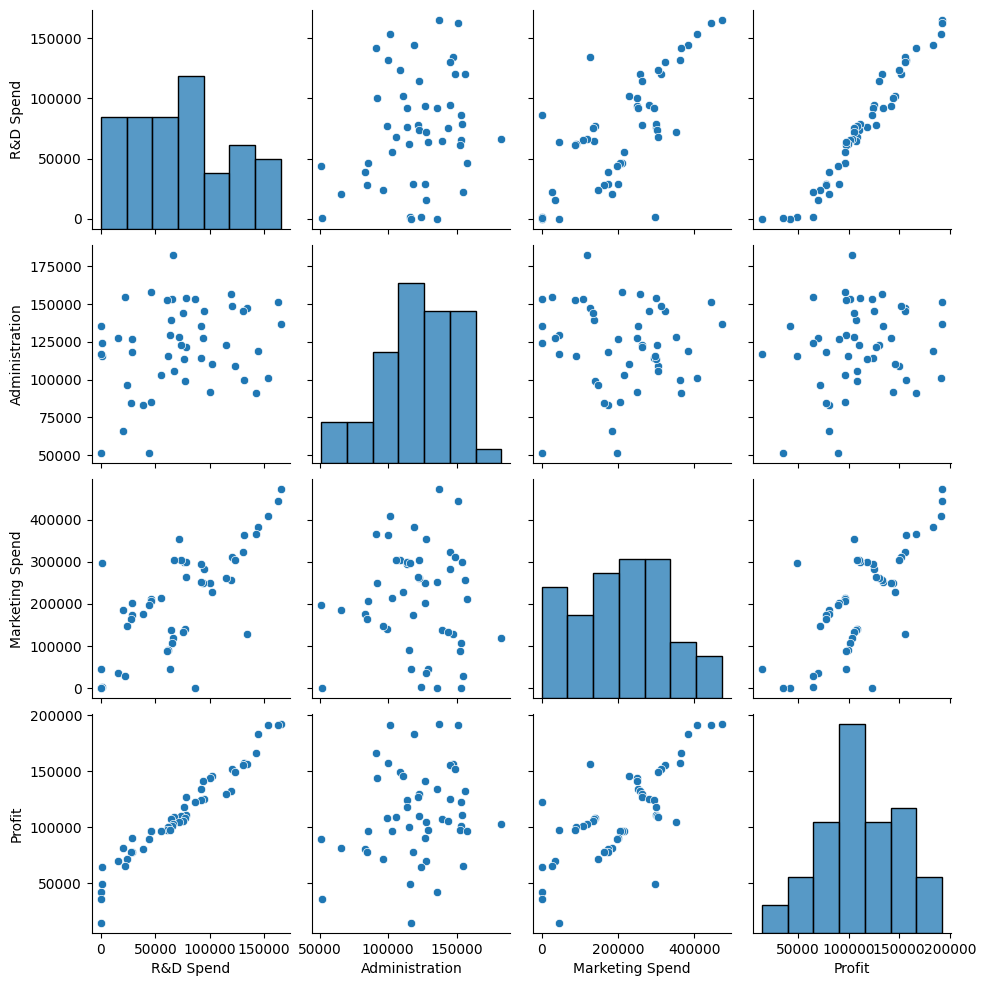

In [8]:
sns.pairplot(Startup_Data)
plt.show()

In [9]:
# Preprocessing the data
# Create dummy variables for the 'State' column
dummy_vars = pd.get_dummies(Startup_Data['State'], drop_first=True)

In [10]:
# Concatenate the dummy variables with the original data frame
startup_data = pd.concat([Startup_Data, dummy_vars], axis=1)


In [ ]:
# Drop the original 'State' column
Startup_Data.drop(['State'], axis=1, inplace=True)


<Axes: >

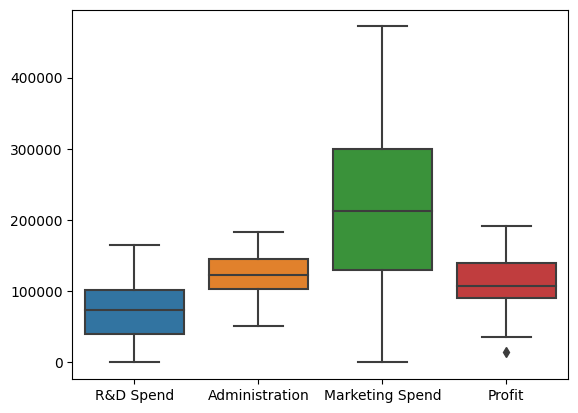

In [11]:
sns.boxplot(Startup_Data)  

In [28]:

# Calculate the IQR
Q1 = Startup_Data['Profit'].quantile(0.25)
Q3 = Startup_Data['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
Startup_NewData = Startup_Data[(Startup_Data['Profit'] >= lower_bound) & (Startup_Data['Profit'] <= upper_bound)]


<Axes: >

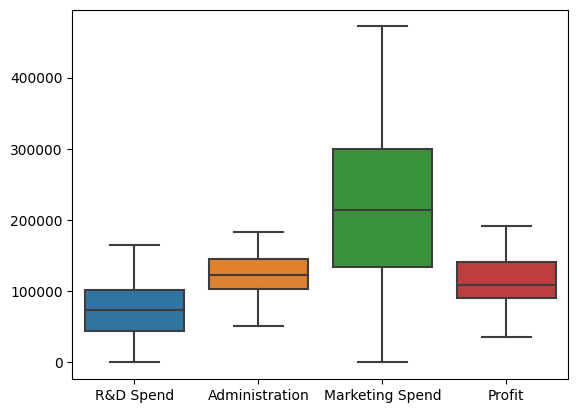

In [32]:
sns.boxplot(Startup_NewData)  

<ipython-input-31-610c5a16ecff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Startup_NewData.corr(),annot=True)


<Axes: >

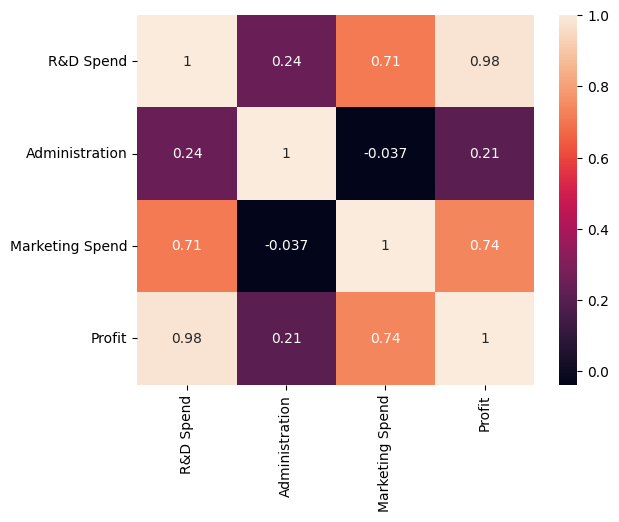

In [31]:
sns.heatmap(Startup_NewData.corr(),annot=True)

In [34]:
Startup_NewData.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [35]:
colname=[]
for x in Startup_NewData.columns:
    if Startup_NewData[x].dtypes=='object':
        colname.append(x)
colname     

['State']

In [36]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    Startup_NewData[x]=le.fit_transform(Startup_NewData[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature State
mapping {'California': 0, 'Florida': 1, 'New York': 2}


<ipython-input-36-3d0d4f919476>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Startup_NewData[x]=le.fit_transform(Startup_NewData[x])


In [37]:
Startup_NewData.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [45]:
# Splitting the dataset into features and target variable
data = Startup_NewData
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [48]:
# Training the Ridge Regression model on the Training set
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)




Ridge(alpha=0.1)

In [49]:
# Training the Lasso Regression model on the Training set
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [50]:
# Predicting the Test set results
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)


In [51]:
# Evaluating the models
from sklearn.metrics import r2_score, mean_squared_error
print("Ridge Regression - R-squared:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("\nLasso Regression - R-squared:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Ridge Regression - R-squared: 0.9709250553545115
Ridge Regression - RMSE: 4931.20903732791

Lasso Regression - R-squared: 0.9709291762640884
Lasso Regression - RMSE: 4930.85956483719
